In [1]:
from event_parser import data_set
import numpy as np
import physics as phys
import vmath as vm 
import CMS_analysis as ana
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy
import cms_plotter as cms_plt
import basic_plotter as bp
import pandas as pd
import seaborn as sns

Note: Figures 2, 3, 4 contain condition lxy > 1cm & lxy < 11cm

In [2]:
#Load a data set, set the parent to being a dark particle, and set
#decay options. Note that these options do not affect the content of
#the data set, it's just book keeping. These values are saved when 
#the data set is saved as a numpy array.
my_set = data_set()
my_set.set_parent(parent_pid = 999999)
my_set.set_decay_options(np.array([11,13,211]))
#my_set.fill_custom("events_CMS_card-cms-m:2-ct:100_mm05.dat")
my_set.fill_saved("../data_arrays/events_CMS_card-cms-m2-ct100_mm05_set.npy")

Fill saved: --- 0.019335031509399414 seconds ---


In [3]:
#Divides the data set into four data sets with only dark particles,
#muons, antimuons, tracks jets
dpA, muA, amuA, tracksA, jetsA= ana.prep_dataset(my_set)
new_events = np.arange(muA.size()) #So that each muon has an individual event
muA.event_index = new_events
amuA.event_index = new_events

In [4]:
#Data is cleared, but the same object is kept. Will be used to load
#and divide other models used in the analysis.
my_set.clear_data()
#my_set.fill_custom("events_CMS_card-cms-m:8-ct:10_mm05.dat")
my_set.fill_saved("../data_arrays/events_CMS_card-cms-m8-ct10_mm05_set.npy")
dpB, muB, amuB, tracksB, jetsB = ana.prep_dataset(my_set)
new_events = np.arange(muB.size()) #So that each muon has an individual event
muB.event_index = new_events
amuB.event_index = new_events

Fill saved: --- 0.010116338729858398 seconds ---


In [5]:
my_set.clear_data()
#my_set.fill_custom("events_CMS_card-cms-m:15-ct:1_mm05.dat")
my_set.fill_saved("../data_arrays/events_CMS_card-cms-m15-ct1_mm05_set.npy")
dpC, muC, amuC, tracksC, jetsC = ana.prep_dataset(my_set)
new_events = np.arange(muC.size()) #So that each muon has an individual event
muC.event_index = new_events
amuC.event_index = new_events

Fill saved: --- 0.013346672058105469 seconds ---


In [6]:
my_set.clear_data()
#my_set.fill_custom("events_CMS_card-cms-m:15-ct:1_mm05.dat")
my_set.fill_saved("../data_arrays/events_B_to_LLP-mp5-ct1_mm09_full_set.npy")
dpD, muD, amuD, tracksD, jetsD = ana.prep_dataset(my_set)
new_events = np.arange(muD.size()) #So that each muon has an individual event
muD.event_index = new_events
amuD.event_index = new_events

Fill saved: --- 0.04804062843322754 seconds ---


In [7]:
my_set.clear_data()
#my_set.fill_custom("events_CMS_card-cms-m:15-ct:1_mm05.dat")
my_set.fill_saved("../data_arrays/events_B_to_LLP-m2-ct10_mm09_full_set.npy")
dpE, muE, amuE, tracksE, jetsE = ana.prep_dataset(my_set)
new_events = np.arange(muE.size()) #So that each muon has an individual event
muE.event_index = new_events
amuE.event_index = new_events

Fill saved: --- 0.0797419548034668 seconds ---


In [8]:
my_set.clear_data()
#my_set.fill_custom("events_CMS_card-cms-m:15-ct:1_mm05.dat")
my_set.fill_saved("../data_arrays/events_B_to_LLP-m4-ct100_mm09_full_set.npy")
dpF, muF, amuF, tracksF, jetsF = ana.prep_dataset(my_set)
new_events = np.arange(muF.size()) #So that each muon has an individual event
muF.event_index = new_events
amuF.event_index = new_events

Fill saved: --- 0.055066823959350586 seconds ---


## List choices for cuts - right now the event cut (combined L1T and HLT_lxy) is automatic

In [9]:
#Lists the possible cut choices that can be implemented. To implement,
#create a cut array with cut[i] set to True or False for the desired
#decay. 
ana.list_choices()

Set filter by inputting an array of choices
Event:0:trig
Event:1:lxy_cut
Pair:2:iso_cut
Pair:3:dphi_muonsDV_cut
Pair:4:dphi_muons_cut
Pair:5:pileup_cut
Pair:6:dxy_cut


## Figure 1
Distribution of $p_T^{\mu\mu}$ for data events and illustrative benchmark signal models, after applying the full event selection.

In [10]:
#Note that cuts[2] = False because isolation is trivial for 
#these models. These plots were made with all cuts implemented.
cuts = np.array([True, True, True, True, True, True, True]) 

In [11]:
#Page 5 of the CMS analysis - see the cuts on dxy significance. We
#did not know sigma explicitly and set it by hand to create plots 
#that best matched the CMS efficiency plots. 
sigma = 0.1 

In [12]:
#For more details on how this algorithm works, see the code. 
#Note that the data sets X and sets final_X actually contain
#all the same information - however final_X are reordered.
#The set final_evt_cutA is a set of boolean variables that state
#whether the pair of muons at the same index passed or did not
#pass the selection criteria.

#The ratio of final/initial muon pairs that pass selection and how
#long the analysis took is printed after the program has run.

In [13]:
final_dpA, final_muA, final_amuA, final_cutA, final_evt_cutA = ana.get_cms_eff(sigma, dpA, muA, amuA, tracksA, jetsA, cuts)

r: 0
s: 20000
Final: 490 muon pairs
Ratio: 0.0245
Analyze time: --- 9.035076379776001 seconds ---


In [14]:
#Sets not the same because ordering is different
final_dpA.is_equal_to(dpA)

True

In [15]:
#Sets contain the same amount of particles. 
print(final_dpA.size()==dpA.size())

True


In [16]:
final_dpB, final_muB, final_amuB, final_cutB, final_evt_cutB = ana.get_cms_eff(sigma, dpB, muB, amuB, tracksB, jetsB, cuts)

r: 0
s: 20000
Final: 8893 muon pairs
Ratio: 0.44465
Analyze time: --- 9.26668405532837 seconds ---


In [17]:
final_dpC, final_muC, final_amuC, final_cutC, final_evt_cutC = ana.get_cms_eff(sigma, dpC, muC, amuC, tracksC, jetsC, cuts)

r: 0
s: 20000
Final: 7997 muon pairs
Ratio: 0.39985
Analyze time: --- 9.020843505859375 seconds ---


In [18]:
final_dpD, final_muD, final_amuD, final_cutD, final_evt_cutD = ana.get_cms_eff(sigma, dpD, muD, amuD, tracksD, jetsD, cuts)

r: 0
s: 2088
Final: 1137 muon pairs
Ratio: 0.5445402298850575
Analyze time: --- 7.899407863616943 seconds ---


In [19]:
final_dpE, final_muE, final_amuE, final_cutE, final_evt_cutE = ana.get_cms_eff(sigma, dpE, muE, amuE, tracksE, jetsE, cuts)

r: 0
s: 3228
Final: 2114 muon pairs
Ratio: 0.6548946716232962
Analyze time: --- 13.176629066467285 seconds ---


Plot creation below

In [20]:
labelA = 'H->ZdZd_m:2-ct:100'
labelB = 'H->ZdZd_m:8-ct:10'
labelC = 'H->ZdZd_m:15-ct:1'
labelD = 'B->phi_m:0.5-ct:1'
labelE = 'B->phi_m:2-ct:10'

In [21]:
dimuon_pTA = phys.comb_pT(final_muA.get(final_cutA), final_amuA.get(final_cutA))
dimuon_pTB = phys.comb_pT(final_muB.get(final_cutB), final_amuB.get(final_cutB))
dimuon_pTC = phys.comb_pT(final_muC.get(final_cutC), final_amuC.get(final_cutC))
dimuon_pTD = phys.comb_pT(final_muD.get(final_cutD), final_amuD.get(final_cutD))
dimuon_pTE = phys.comb_pT(final_muE.get(final_cutE), final_amuE.get(final_cutE))

In [22]:
#Plot settings
hs = 'step'
lw = 1.5
nbins = 50
rng = (0, 100.)
dns = True

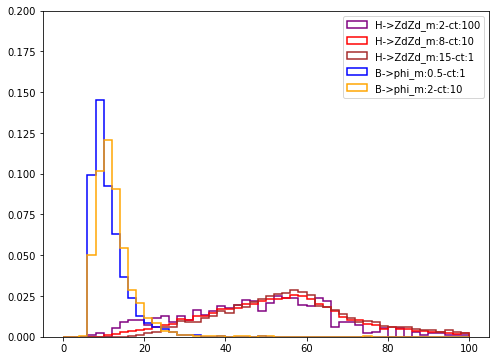

In [23]:
fig = plt.figure(figsize=(8,6))
plt.ylim((0,0.2))
plt.hist(dimuon_pTA, histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color='purple', label=labelA)
plt.hist(dimuon_pTB, histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color='red', label=labelB)
plt.hist(dimuon_pTC, histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color='brown', label=labelC)
plt.hist(dimuon_pTD, histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color='blue', label=labelD)
plt.hist(dimuon_pTE, histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color='orange', label=labelE)
plt.legend()
plt.show()
fig.savefig("../images/add_fig_1.png")

In [24]:
#Cut selections printed beneath plot -- just to be certain.
ana.print_cut_selection(cuts)

Cut choices
True:trig
True:lxy_cut
True:iso_cut
True:dphi_muonsDV_cut
True:dphi_muons_cut
True:pileup_cut
True:dxy_cut


## Figure 2 
Distribution of $\Delta(\mu\mu, \vec{DV})$ for data events and illustrative benchmark signal models, after applying the trigger selections and muon and DV quality criteria. 

In [25]:
#Since quality criteria were not included in our analysis, the
#only cut comes from trigger selections. 
cuts = np.array([True, False, False, False, False, False, False])

In [26]:
final_dpA, final_muA, final_amuA, final_cutA, final_evt_cutA = ana.get_cms_eff(sigma, dpA, muA, amuA, tracksA, jetsA, cuts)

r: 0
s: 20000
Final: 14055 muon pairs
Ratio: 0.70275
Analyze time: --- 0.03430891036987305 seconds ---


In [27]:
final_dpB, final_muB, final_amuB, final_cutB, final_evt_cutB = ana.get_cms_eff(sigma, dpB, muB, amuB, tracksB, jetsB, cuts)

r: 0
s: 20000
Final: 13628 muon pairs
Ratio: 0.6814
Analyze time: --- 0.03244161605834961 seconds ---


In [28]:
final_dpC, final_muC, final_amuC, final_cutC, final_evt_cutC = ana.get_cms_eff(sigma, dpC, muC, amuC, tracksC, jetsC, cuts)

r: 0
s: 20000
Final: 12916 muon pairs
Ratio: 0.6458
Analyze time: --- 0.025500059127807617 seconds ---


In [29]:
#Note: Just the trigger selections remove the vast majority of the B model
final_dpD, final_muD, final_amuD, final_cutD, final_evt_cutD = ana.get_cms_eff(sigma, dpD, muD, amuD, tracksD, jetsD, cuts)

r: 0
s: 2088
Final: 2088 muon pairs
Ratio: 1.0
Analyze time: --- 0.00641942024230957 seconds ---


In [30]:
final_dpE, final_muE, final_amuE, final_cutE, final_evt_cutE = ana.get_cms_eff(sigma, dpE, muE, amuE, tracksE, jetsE, cuts)

r: 0
s: 3228
Final: 3228 muon pairs
Ratio: 1.0
Analyze time: --- 0.007807016372680664 seconds ---


In [31]:
#The figure recreated had also the specification that 
#1.0 cm < lxy < 11.0 cm. Thus, this was applied to all cuts.
final_cutA = final_cutA & (phys.lxy(final_muA) > 10.) & (phys.lxy(final_muA) < 110.)
final_cutB = final_cutB & (phys.lxy(final_muB) > 10.) & (phys.lxy(final_muB) < 110.)
final_cutC = final_cutC & (phys.lxy(final_muC) > 10.) & (phys.lxy(final_muC) < 110.)
final_cutD = final_cutD & (phys.lxy(final_muD) > 10.) & (phys.lxy(final_muD) < 110.)
final_cutE = final_cutE & (phys.lxy(final_muE) > 10.) & (phys.lxy(final_muE) < 110.)

In [32]:
#Deep copy is necessary here because otherwise function
#changes the original array. Numpy artifact.

#DV is the distance from the IP to where the muon first appeared
DV = deepcopy(final_muA.xi)
pmm = (final_muA.p + final_amuA.p)
dphiA = vm.vec4_dphi(DV, pmm)
#DV[:,3] = 0
#pmm = (final_muA.p + final_amuA.p)
#dphiA = vm.vec4_dphi(DV, pmm)

In [33]:
DV = deepcopy(final_muB.xi)
#DV[:,3] = 0
pmm = (final_muB.p + final_amuB.p)
dphiB = vm.vec4_dphi(DV, pmm)

In [34]:
DV = deepcopy(final_muC.xi)
#DV[:,3] = 0
pmm = (final_muC.p + final_amuC.p)
dphiC = vm.vec4_dphi(DV, pmm)

In [35]:
DV = deepcopy(final_muD.xi)
#DV[:,3] = 0
pmm = (final_muD.p + final_amuD.p)
dphiD = vm.vec4_dphi(DV, pmm)

In [36]:
DV = deepcopy(final_muE.xi)
#DV[:,3] = 0
pmm = (final_muE.p + final_amuE.p)
dphiE = vm.vec4_dphi(DV, pmm)

In [37]:
hs = 'step'
lw = 1.5
nbins = 20
rng = (0, 0.2)
dns = True

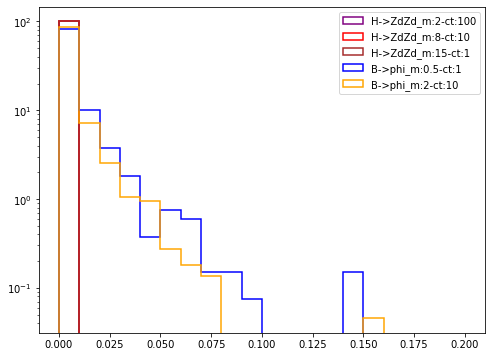

In [38]:
fig = plt.figure(figsize=(8,6))
plt.yscale('log')
plt.hist(dphiA[final_cutA], histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color="purple", label=labelA)
plt.hist(dphiB[final_cutB], histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color="red", label=labelB)
plt.hist(dphiC[final_cutC], histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color="brown", label=labelC)
plt.hist(dphiD[final_cutD], histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color="blue", label=labelD)
plt.hist(dphiE[final_cutE], histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color="orange", label=labelE)
plt.legend()
plt.show()
fig.savefig("../images/add_fig_2.png")

In [39]:
ana.print_cut_selection(cuts)

Cut choices
True:trig
False:lxy_cut
False:iso_cut
False:dphi_muonsDV_cut
False:dphi_muons_cut
False:pileup_cut
False:dxy_cut


## Figure 3
Distribution of $log_{10}(|\Delta\eta_{\mu\mu}|/\Delta\phi_{\mu\mu}|)$ in data events and illustrative benchmark signal models. The cut value is indicated by the red vertical dashed line. All selections except those involivng muon isolation, $d_{xy}$, and number of excess hits in the pixel tracker for each muon are applied. 

In [40]:
cuts = np.array([True, True, False, True, True, False, False])
final_dpA, final_muA, final_amuA, final_cutA, final_evt_cutA = ana.get_cms_eff(sigma, dpA, muA, amuA, jetsA, tracksA, cuts)

r: 0
s: 20000
Final: 604 muon pairs
Ratio: 0.0302
Analyze time: --- 0.03315401077270508 seconds ---


In [41]:
final_dpB, final_muB, final_amuB, final_cutB, final_evt_cutB = ana.get_cms_eff(sigma, dpB, muB, amuB, jetsB, tracksB, cuts)

r: 0
s: 20000
Final: 10509 muon pairs
Ratio: 0.52545
Analyze time: --- 0.029786109924316406 seconds ---


In [42]:
final_dpC, final_muC, final_amuC, final_cutC, final_evt_cutC = ana.get_cms_eff(sigma, dpC, muC, amuC, tracksC, jetsC, cuts)

r: 0
s: 20000
Final: 12915 muon pairs
Ratio: 0.64575
Analyze time: --- 0.030230283737182617 seconds ---


In [43]:
final_dpD, final_muD, final_amuD, final_cutD, final_evt_cutD = ana.get_cms_eff(sigma, dpD, muD, amuD, tracksD, jetsD, cuts)

r: 0
s: 2088
Final: 1651 muon pairs
Ratio: 0.7907088122605364
Analyze time: --- 0.006745338439941406 seconds ---


In [44]:
final_dpE, final_muE, final_amuE, final_cutE, final_evt_cutE = ana.get_cms_eff(sigma, dpE, muE, amuE, tracksD, jetsD, cuts)

r: 0
s: 3228
Final: 2335 muon pairs
Ratio: 0.7233581164807931
Analyze time: --- 0.008124351501464844 seconds ---


In [45]:
#The figure recreated had also the specification that 
#1.0 cm < lxy < 11.0 cm. Thus, this was applied to all cuts.
final_cutA = final_cutA & (phys.lxy(final_muA) > 10.) & (phys.lxy(final_muA) < 110.)
final_cutB = final_cutB & (phys.lxy(final_muB) > 10.) & (phys.lxy(final_muB) < 110.)
final_cutC = final_cutC & (phys.lxy(final_muC) > 10.) & (phys.lxy(final_muC) < 110.)
final_cutD = final_cutD & (phys.lxy(final_muD) > 10.) & (phys.lxy(final_muD) < 110.)
final_cutE = final_cutE & (phys.lxy(final_muE) > 10.) & (phys.lxy(final_muE) < 110.)

In [46]:
pileupA = phys.pileup(final_muA, final_amuA)
pileupB = phys.pileup(final_muB, final_amuB)
pileupC = phys.pileup(final_muC, final_amuC)
pileupD = phys.pileup(final_muD, final_amuD)
pileupE = phys.pileup(final_muE, final_amuE)

In [47]:
hs = 'step'
lw = 1.5
nbins = 20
rng = (0, 0.2)
dns = True

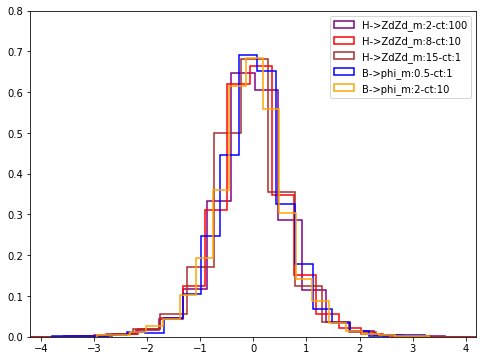

In [48]:
fig = plt.figure(figsize=(8,6))
plt.ylim((0,0.8))
plt.xlim((-4.2,4.2))
plt.hist(pileupA, histtype=hs, linewidth=lw, bins=nbins, density=dns, color="purple", label=labelA)
plt.hist(pileupB, histtype=hs, linewidth=lw, bins=nbins, density=dns, color="red", label=labelB)
plt.hist(pileupC, histtype=hs, linewidth=lw, bins=nbins, density=dns, color="brown", label=labelC)
plt.hist(pileupD, histtype=hs, linewidth=lw, bins=nbins, density=dns, color="blue", label=labelD)
plt.hist(pileupE, histtype=hs, linewidth=lw, bins=nbins, density=dns, color="orange", label=labelE)
plt.legend()
plt.show()
fig.savefig("../images/add_fig_3.png")

In [49]:
ana.print_cut_selection(cuts)

Cut choices
True:trig
True:lxy_cut
False:iso_cut
True:dphi_muonsDV_cut
True:dphi_muons_cut
False:pileup_cut
False:dxy_cut
